In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Problem Description

We solve the fourier partial differential equation using an explicit finite-difference scheme.

$$L(u): \frac{\partial u}{\partial t} = \gamma \frac{\partial^2 u}{\partial x^2}$$
$$L_{\Delta}(u): \frac{u_{i}^{n+1} - u_{i}^{n}}{\Delta t} = \gamma \frac{u_{i+1}^{n} - 2u_{i}^{n} + u_{i-1}^{n}}{\Delta x^2}$$

### Finite-difference equation describing discrete error propogation for Fourier Equation

$$\varepsilon_{i}^{n+1} = \sigma \varepsilon_{i-1}^{n} + (1 - 2\sigma)\varepsilon_{i}^{n} + \sigma\varepsilon_{i+1}^{n}$$
where $\varepsilon_{i}^{n}$ is the discrete error value at $i^{th}$ grid point at $n^{th}$ time-step and $\sigma = \gamma \frac{\Delta t}{\Delta x^2}$

The error is introduced at a given grid point ($i_d$) at time-step $n = 0$.


In [13]:
# Time-steps
delt = 0.5 # Time step-size
time = np.arange(0,3.5,delt)
time
# Spatial-steps
delx = 0.1 # Space step-size
space = np.arange(0,1.1,delx)
space

# Grid-Point at which discrete perturbation is introduced
id = 4
# Intial value of error
errIn = 0.2

# Error Array
errorArr = np.zeros(shape = (len(time),len(space)))
errorArr[0,id] = errIn # Initialising error
errorArr

array([[0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

According to dicrete perturbation theory, the scheme is numerically stable for $\sigma \leq 0.5$

In [27]:
sigma = 1

# Rule for filling error array according to FDE govering error propogation
for kk in range(1,len(time)):
    for jj in range(1,len(space)-1): # Assuming error at grid-points 0 and 10 always stays zero
        errorArr[kk,jj] = sigma*errorArr[kk-1,jj-1] + (1-2*sigma)*errorArr[kk-1,jj] + sigma*errorArr[kk-1,jj+1]

error = pd.DataFrame(errorArr,index = time, columns = space)
error

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,0.0,0.2,-0.2,0.2,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.2,-0.4,0.6,-0.4,0.2,0.0,0.0,0.0,0.0
1.5,0.0,0.2,-0.6,1.2,-1.4,1.2,-0.6,0.2,0.0,0.0,0.0
2.0,0.0,-0.8,2.0,-3.2,3.8,-3.2,2.0,-0.8,0.2,0.0,0.0
2.5,0.0,2.8,-6.0,9.0,-10.2,9.0,-6.0,3.0,-1.0,0.2,0.0
3.0,0.0,-8.8,17.8,-25.2,28.2,-25.2,18.0,-10.0,4.2,-1.2,0.0


Text(0.5, 1.0, '$\\sigma = $1')

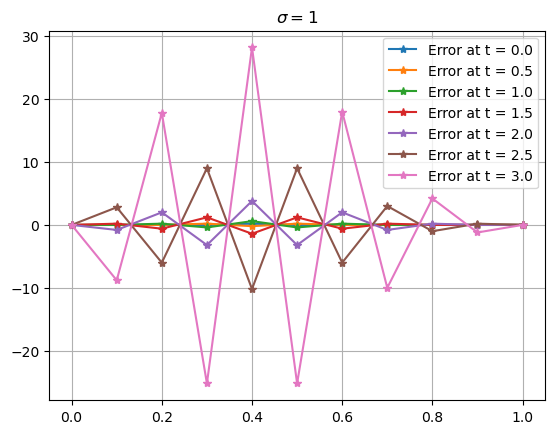

In [28]:
# Plotting the error
plt.show()
plt.grid()
for kk in range(0,len(time)):
    plt.plot(space,errorArr[kk,:],'-*',label = 'Error at t = ' + str(time[kk]))
plt.legend() 
plt.title('$\sigma = $' + str(sigma))